In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-attrition/Employee-Attrition.csv


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
from matplotlib.pyplot import figure
%matplotlib inline

In [3]:
data=pd.read_csv("/kaggle/input/employee-attrition/Employee-Attrition.csv")
Y=data["Attrition"]
data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.isnull().sum().sum()
#No null values.

0

In [5]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


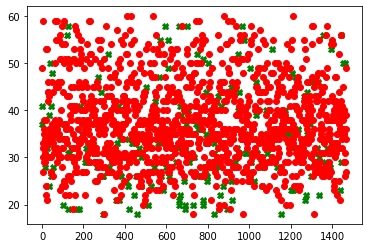

In [7]:
#Age
plt.plot(data.Age[data.Attrition=="Yes"], 'Xg')
plt.plot(data.Age[data.Attrition=="No"], 'or')

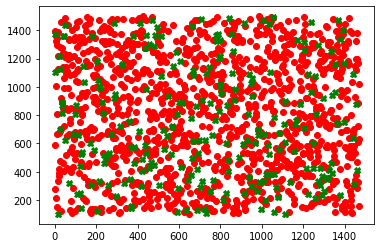

In [8]:
#DailyRate

plt.plot(data.DailyRate[data.Attrition=="No"], 'or')
plt.plot(data.DailyRate[data.Attrition=="Yes"], 'Xg')

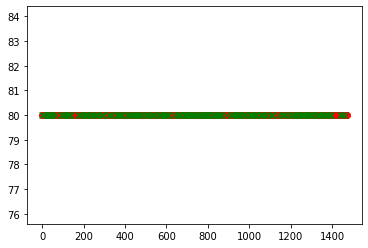

In [9]:

plt.plot(data.StandardHours[data.Attrition=="No"], 'or')
plt.plot(data.StandardHours[data.Attrition=="Yes"], 'xg')

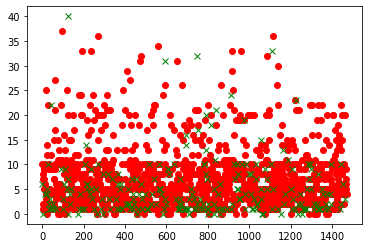

In [10]:
#YearsAtCompany

plt.plot(data.YearsAtCompany[data.Attrition=="No"], 'or')
plt.plot(data.YearsAtCompany[data.Attrition=="Yes"], 'xg')

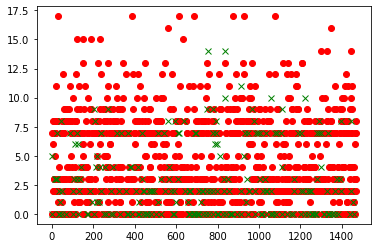

In [11]:
#YearsWithCurrManager
plt.plot(data.YearsWithCurrManager[data.Attrition=="No"], 'or')
plt.plot(data.YearsWithCurrManager[data.Attrition=="Yes"], 'xg')

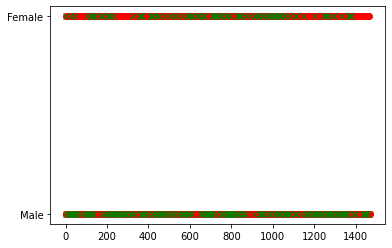

In [12]:
#Gender
plt.plot(data.Gender[data.Attrition=="No"], 'or')
plt.plot(data.Gender[data.Attrition=="Yes"], 'xg')

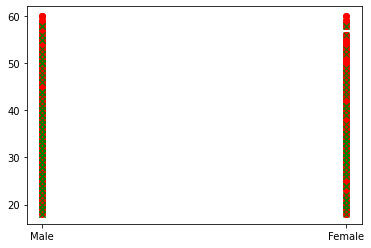

In [13]:
#Gender
plt.plot(data.Gender[data.Attrition=="No"], data.Age[data.Gender[data.Attrition=="No"].index],'or')
plt.plot(data.Gender[data.Attrition=="Yes"], data.Age[data.Gender[data.Attrition=="Yes"].index], 'xg')

In [14]:
data["JobInvolvement"]

0       3
1       2
2       2
3       3
4       3
       ..
1465    4
1466    2
1467    4
1468    2
1469    4
Name: JobInvolvement, Length: 1470, dtype: int64

In [41]:
print("No of columns are ",len(data.columns))
print(data.columns)

No of columns are  35
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [35]:
columns_to_drop=[2,4,5,6,8,9,10,11,13,14,16]

In [100]:
# data=data.columns.drop(data.columns[5]
rslt_df = df.drop(data.columns[columns_to_drop],axis = 1)
len(rslt_df.columns)

24

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


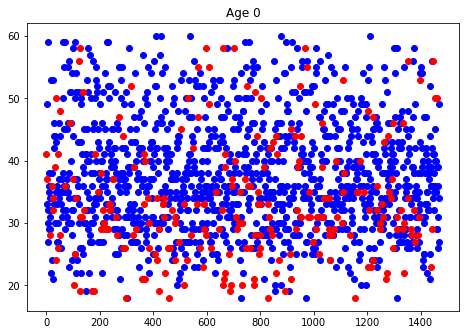

<Figure size 800x800 with 0 Axes>

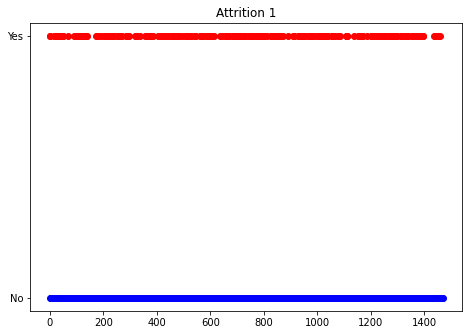

<Figure size 800x800 with 0 Axes>

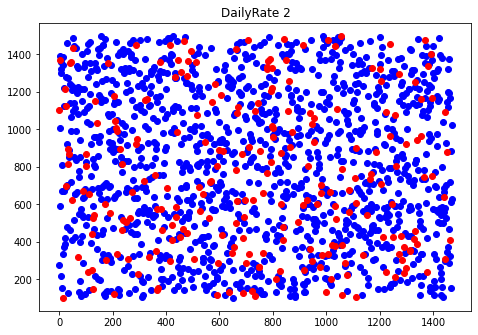

<Figure size 800x800 with 0 Axes>

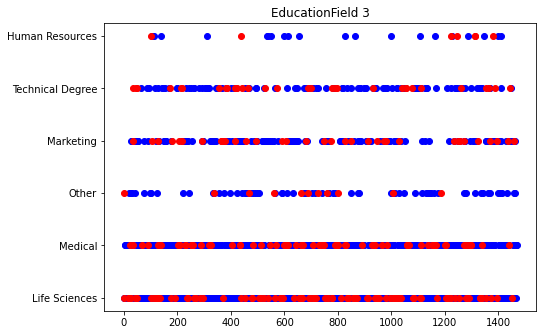

<Figure size 800x800 with 0 Axes>

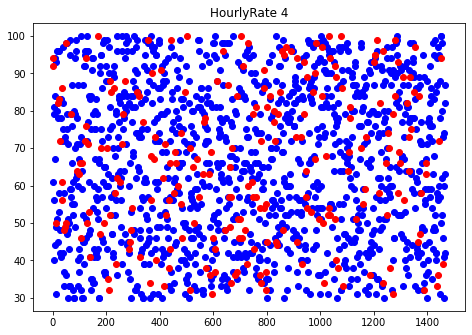

<Figure size 800x800 with 0 Axes>

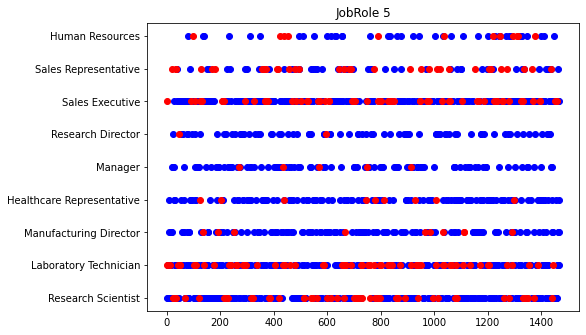

<Figure size 800x800 with 0 Axes>

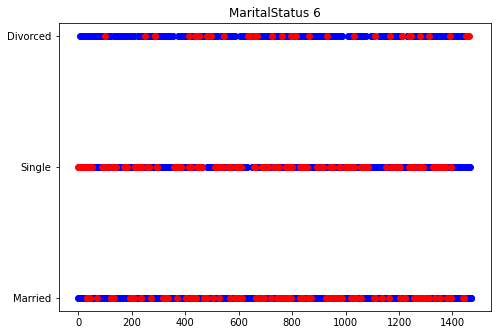

<Figure size 800x800 with 0 Axes>

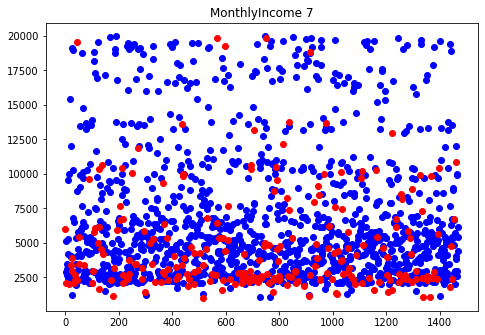

<Figure size 800x800 with 0 Axes>

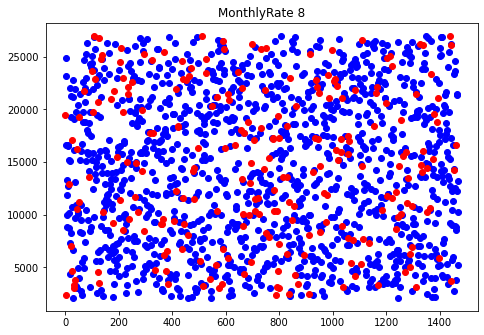

<Figure size 800x800 with 0 Axes>

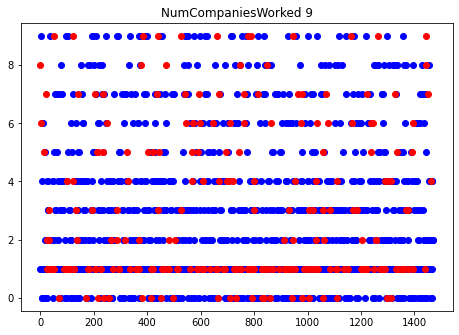

<Figure size 800x800 with 0 Axes>

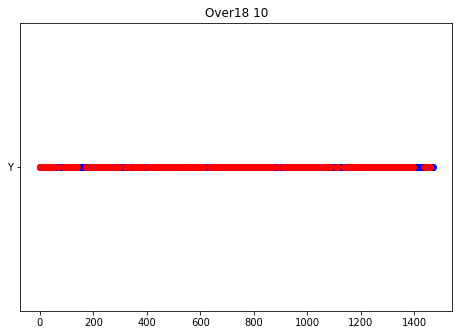

<Figure size 800x800 with 0 Axes>

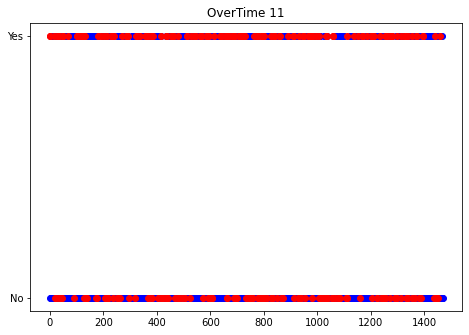

<Figure size 800x800 with 0 Axes>

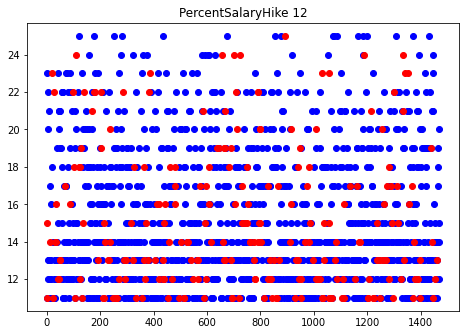

<Figure size 800x800 with 0 Axes>

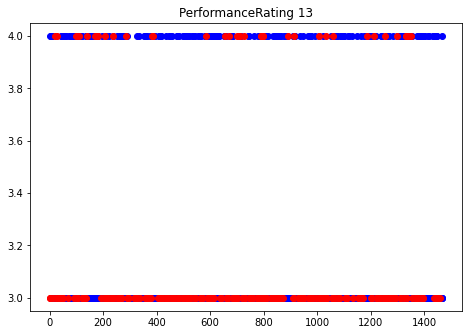

<Figure size 800x800 with 0 Axes>

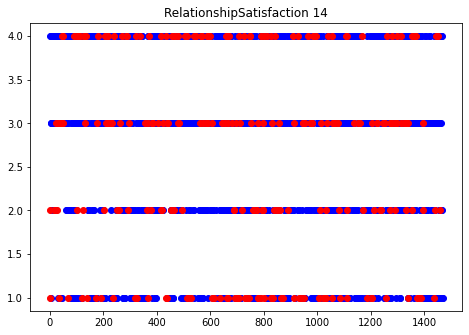

<Figure size 800x800 with 0 Axes>

In [102]:
i=0
for c in rslt_df.columns[0:15]:
    fig, axes = plt.subplots(nrows=1, ncols=1)
    figure(figsize=(10, 10), dpi=80)
    ax=fig.add_axes([0,0,1,1])
    y=data[c][data['Attrition']=="No"]
    x=(data[c][data['Attrition']=="No"]).index
    ax.scatter(x,y,color='b')
    y=data[c][data['Attrition']=="Yes"]
    x=(data[c][data['Attrition']=="Yes"]).index
    ax.scatter(x,y,color='r')
    ax.set_title(c+" "+str(i))
    i=i+1


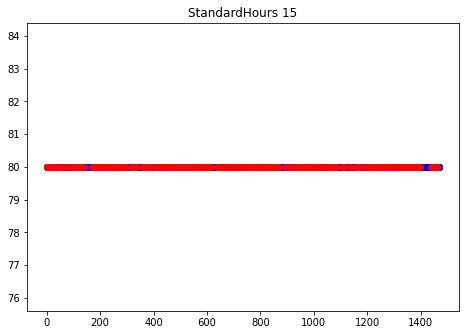

<Figure size 800x800 with 0 Axes>

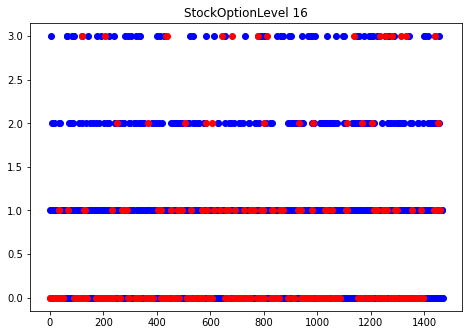

<Figure size 800x800 with 0 Axes>

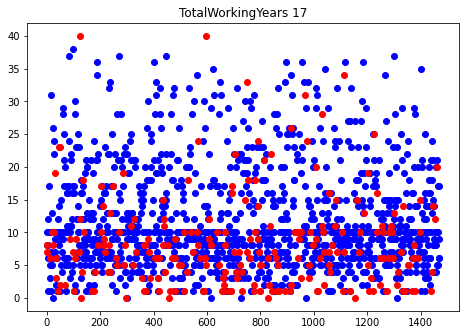

<Figure size 800x800 with 0 Axes>

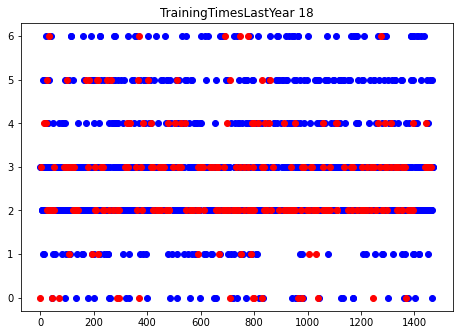

<Figure size 800x800 with 0 Axes>

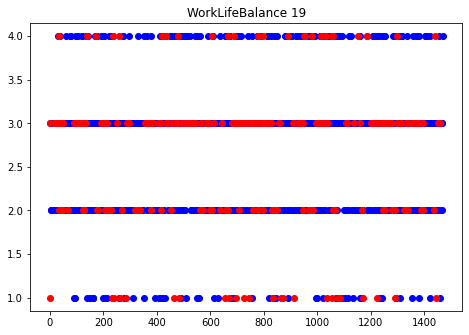

<Figure size 800x800 with 0 Axes>

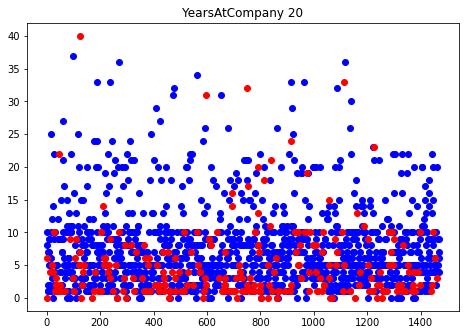

<Figure size 800x800 with 0 Axes>

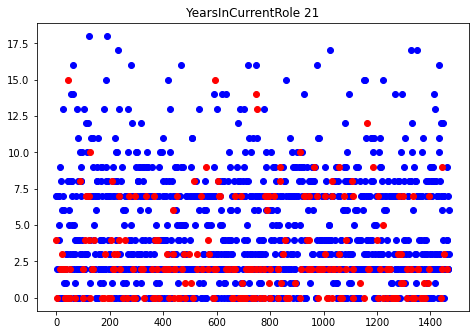

<Figure size 800x800 with 0 Axes>

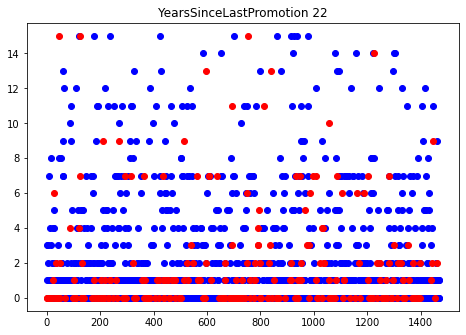

<Figure size 800x800 with 0 Axes>

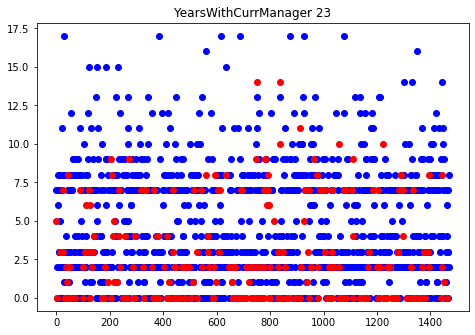

<Figure size 800x800 with 0 Axes>

In [103]:
for c in rslt_df.columns[15:]:
    fig, axes = plt.subplots(nrows=1, ncols=1)
    figure(figsize=(10, 10), dpi=80)
    ax=fig.add_axes([0,0,1,1])
    y=data[c][data['Attrition']=="No"]
    x=(data[c][data['Attrition']=="No"]).index
    ax.scatter(x,y,color='b')
    y=data[c][data['Attrition']=="Yes"]
    x=(data[c][data['Attrition']=="Yes"]).index
    ax.scatter(x,y,color='r')
    ax.set_title(c+" "+str(i))
    i=i+1

Based on the grpahs we can find which fetaures are usefull and which are not.
This gets me the conclusion that these columns are futher not necesaary 
##  3 5 6 10 11 14 15 19


In [104]:
new_columns_toremove=[3, 5, 6 ,10 ,11 ,14 ,15 ,19]
rslt_df = rslt_df.drop(rslt_df.columns[new_columns_toremove],axis = 1)
len(rslt_df.columns)

16

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


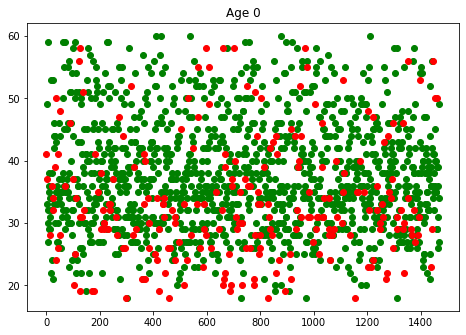

<Figure size 800x800 with 0 Axes>

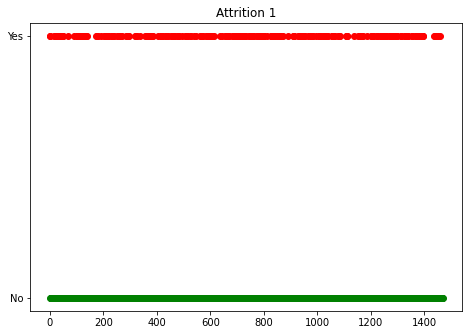

<Figure size 800x800 with 0 Axes>

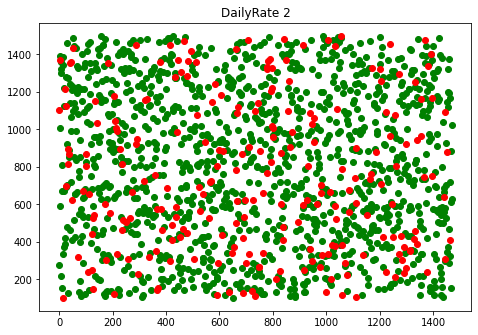

<Figure size 800x800 with 0 Axes>

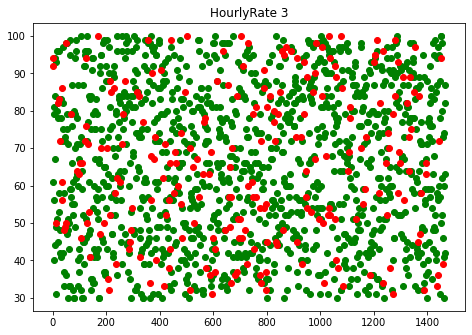

<Figure size 800x800 with 0 Axes>

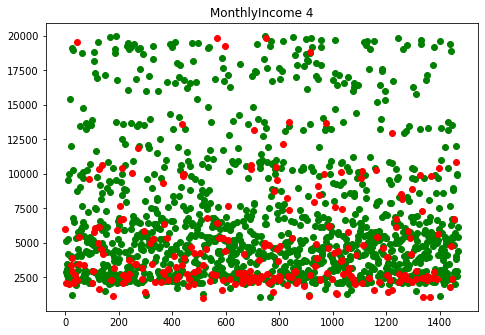

<Figure size 800x800 with 0 Axes>

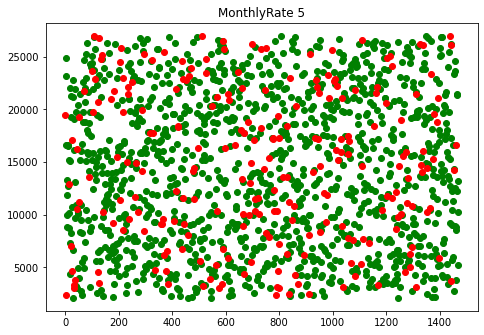

<Figure size 800x800 with 0 Axes>

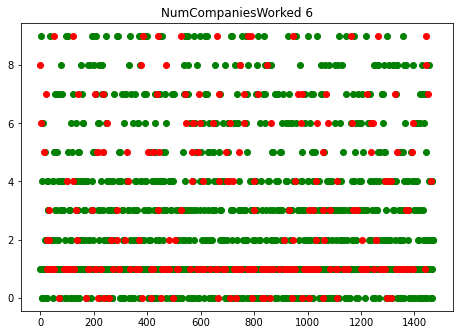

<Figure size 800x800 with 0 Axes>

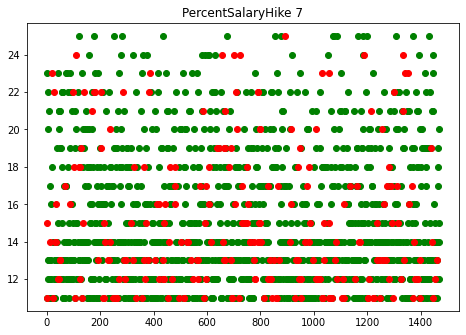

<Figure size 800x800 with 0 Axes>

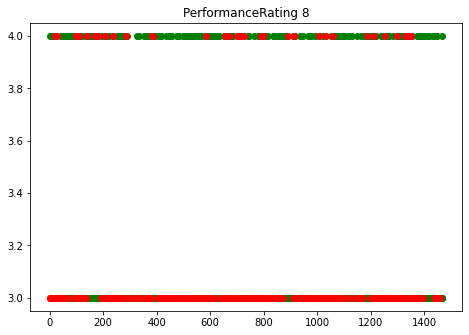

<Figure size 800x800 with 0 Axes>

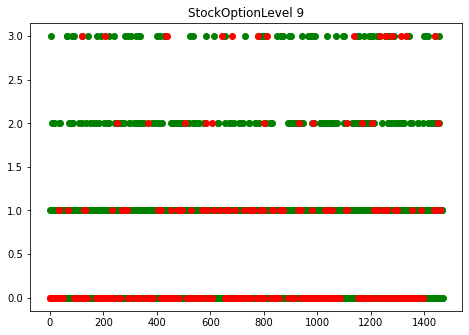

<Figure size 800x800 with 0 Axes>

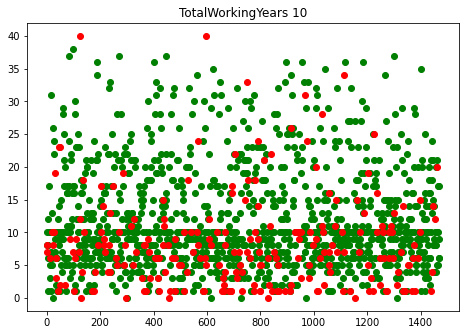

<Figure size 800x800 with 0 Axes>

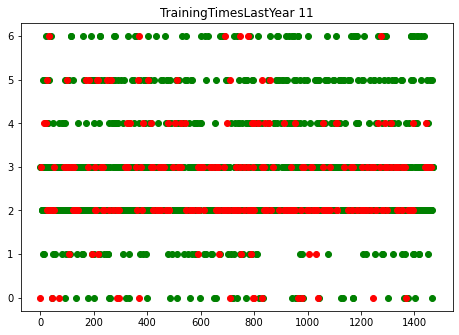

<Figure size 800x800 with 0 Axes>

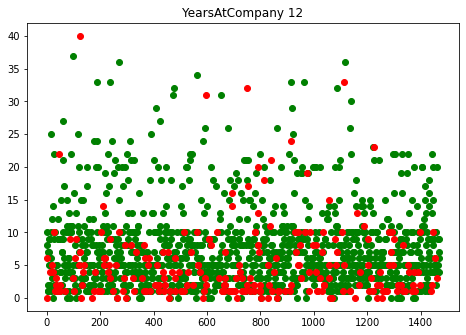

<Figure size 800x800 with 0 Axes>

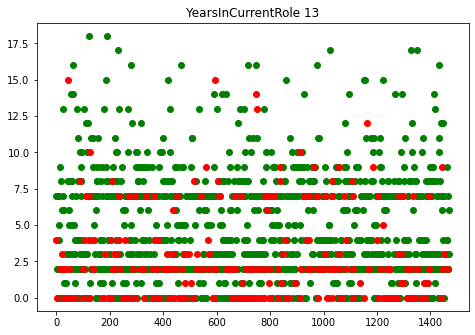

<Figure size 800x800 with 0 Axes>

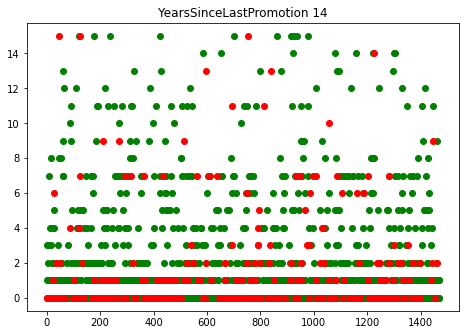

<Figure size 800x800 with 0 Axes>

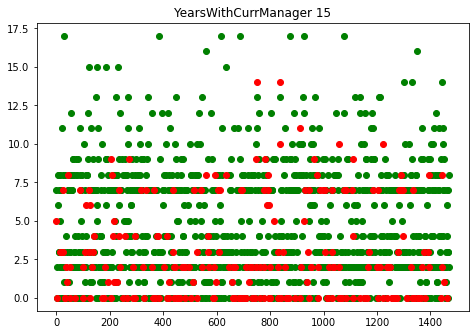

<Figure size 800x800 with 0 Axes>

In [106]:
i=0
for c in rslt_df.columns[0:20]:
    fig, axes = plt.subplots(nrows=1, ncols=1)
    figure(figsize=(10, 10), dpi=80)
    ax=fig.add_axes([0,0,1,1])
    y=rslt_df[c][rslt_df['Attrition']=="No"]
    x=(rslt_df[c][rslt_df['Attrition']=="No"]).index
    ax.scatter(x,y,color='g')
    y=rslt_df[c][rslt_df['Attrition']=="Yes"]
    x=(rslt_df[c][rslt_df['Attrition']=="Yes"]).index
    ax.scatter(x,y,color='r')
    ax.set_title(c+" "+str(i))
    i=i+1

In [109]:
from sklearn.model_selection import train_test_split

In [129]:
x=rslt_df.drop(rslt_df.columns[1],axis=1)
rslt_df["y"] = np.select([rslt_df.Attrition=="No" , rslt_df.Attrition=="Yes"] , [0,1] )
y=rslt_df["y"]

100    1
101    0
102    1
103    0
104    0
      ..
295    0
296    1
297    0
298    0
299    0
Name: y, Length: 200, dtype: int64

In [130]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [131]:
print(X_train,X_test,y_train,y_test)

      Age  DailyRate  HourlyRate  MonthlyIncome  MonthlyRate  \
944    28       1476          55           6674        16392   
1402   31       1276          59           1129        17536   
1054   49       1490          35          10466        20948   
1128   36       1302          80           5562        19711   
1323   28        280          43           2706        10494   
...   ...        ...         ...            ...          ...   
763    34       1333          87           2220        18410   
835    35        528         100           4323         7108   
1216   43       1179          73           7847         6069   
559    38        268          92           3057        20471   
684    40        658          67           9705        20652   

      NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
944                    0                 11                  3   
1402                   1                 11                  3   
1054                   3         

In [133]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

AttributeError: 'str' object has no attribute 'decode'